# Hypothesis Test Power function.
Definitions  

|                      | H0 True            | H0 False          |
|----------------------|--------------------|-------------------|
| **Reject H0**        | Type I error (α)   | Power (1‐β)       |
| **Fail to reject H0**| 1‐α                | Type II error (β) |



### General Formulation:

Consider a statistical test with the following hypotheses:

- **Null Hypothesis ($H_0$):**  
  $ \theta = \theta_0 $

- **Alternative Hypothesis ($H_1$):**  
  $ \theta = \theta_1 $

Here, $\theta$ represents the parameter of interest, and $\theta_0$ and $\theta_1$ are specific values under the null and alternative hypotheses, respectively.

### Power Function:


The power function $ \gamma(\theta) $ is defined as the probability of rejecting the null hypothesis when the true parameter value is $\theta$. Mathematically, it is given by:

$$ \gamma(\theta) = P(\text{Reject } H_0 \mid \theta = \theta) $$

### Two-sided example:

- **Null Hypothesis ($H_0$):**  
  $ \theta = \theta_0 $

- **Alternative Hypothesis ($H_1$):**  
  $ \theta \neq \theta_1 $

\begin{align*}
\gamma(\theta) &= P(\text{Reject } H_0 \mid \theta = \theta) \\
&= P\left(\left|Z \right| \geq Z_{crit} \mid \theta = \theta\right)     \\
&= P\left(\left|\frac{\bar{X} - \theta_0}{\frac{\sigma}{\sqrt{N}}} \right| \geq Z_{crit} \mid \theta = \theta \right) \\
&= P\left(\frac{\bar{X} - \theta_0}{\frac{\sigma}{\sqrt{N}}} \geq Z_{crit} \mid \theta = \theta \right) + P\left(\frac{\bar{X} - \theta_0}{\frac{\sigma}{\sqrt{N}}} < -Z_{crit} \mid \theta = \theta \right) \\
&= P\left(\frac{\bar{X} - \theta_0 + \theta -\theta}{\frac{\sigma}{\sqrt{N}}} \geq Z_{crit} \mid \theta = \theta \right) + P\left(\frac{\bar{X} - \theta_0 + \theta -\theta}{\frac{\sigma}{\sqrt{N}}} < -Z_{crit} \mid \theta = \theta \right) \\
&= P\left(\frac{\bar{X} -\theta}{\frac{\sigma}{\sqrt{N}}} \geq Z_{crit} + \frac{\theta_0 - \theta}{\frac{\sigma}{\sqrt{N}}} \mid \theta = \theta \right) + P\left(\frac{\bar{X} -\theta}{\frac{\sigma}{\sqrt{N}}} < -Z_{crit} + \frac{\theta_0 - \theta}{\frac{\sigma}{\sqrt{N}}} \mid \theta = \theta \right) \\
&= 1 - \Phi(Z_{crit} + \frac{\theta_0 - \theta}{\frac{\sigma}{\sqrt{N}}}) + \Phi(-Z_{crit} + \frac{\theta_0 - \theta}{\frac{\sigma}{\sqrt{N}}})\\
\end{align*}

### One-sided example:

- **Null Hypothesis ($H_0$):**  
  $ \theta = \theta_0 $

- **Alternative Hypothesis ($H_1$):**  
  $ \theta \geq \theta_1 $

\begin{align*}
\gamma(\theta) &= P(\text{Reject } H_0 \mid \theta = \theta) \\
&= P\left(Z \geq Z_{crit} \mid \theta = \theta\right)     \\
&= P\left(\frac{\bar{X} - \theta_0}{\frac{\sigma}{\sqrt{N}}}  \geq Z_{crit} \mid \theta = \theta \right) \\
&= P\left(\frac{\bar{X} - \theta_0}{\frac{\sigma}{\sqrt{N}}} \geq Z_{crit} \mid \theta = \theta \right)  \\
&= P\left(\frac{\bar{X} - \theta_0 + \theta -\theta}{\frac{\sigma}{\sqrt{N}}} \geq Z_{crit} \mid \theta = \theta \right)  \\
&= P\left(\frac{\bar{X} -\theta}{\frac{\sigma}{\sqrt{N}}} \geq Z_{crit} + \frac{\theta_0 - \theta}{\frac{\sigma}{\sqrt{N}}} \mid \theta = \theta \right) \\
&= 1 - \Phi(Z_{crit} + \frac{\theta_0 - \theta}{\frac{\sigma}{\sqrt{N}}})\\
\end{align*}


Power one-sided: 0.04999999999999993
Power two-sided: 0.050000000000000086


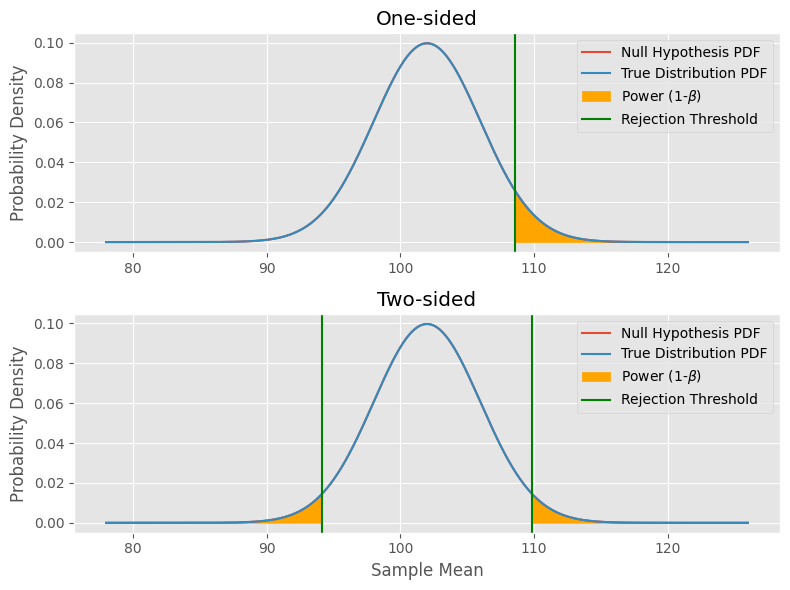

In [2]:
from mystats.plots.ztest.power import plot_power

theta_true = 102

theta_0 = 102
n = 16
sigma = 16
alpha = 0.05

plot_power(theta_true, theta_0, n, sigma, alpha)

Power one-sided: 0.9823607156755024
Power two-sided: 0.9632759447845628


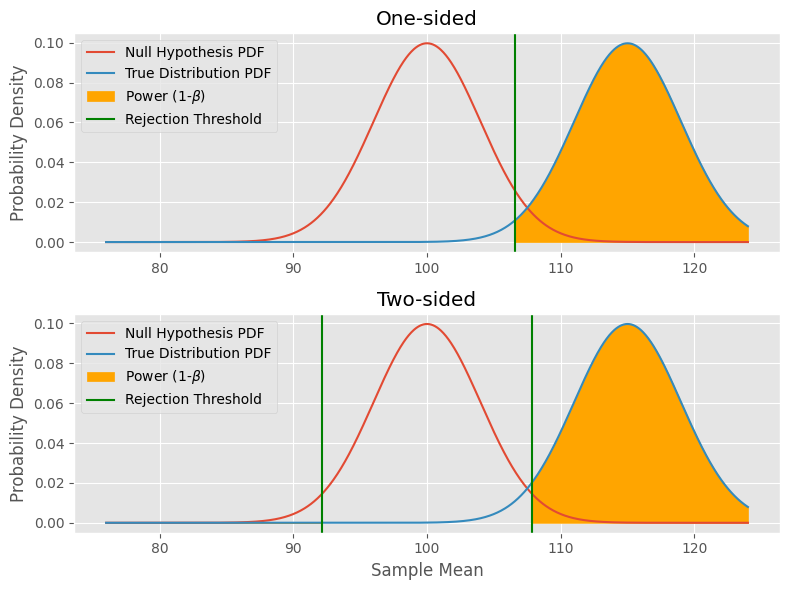

In [3]:
theta_true = 115

theta_0 = 100
n = 16
sigma = 16
alpha = 0.05

plot_power(theta_true, theta_0, n, sigma, alpha)

### Power Function:



In [4]:
from scipy import stats
import numpy as np

def power_function_z_onesided(theta: float, theta_0: float, sigma: float, n: int, alpha: float = 0.05) -> float:
    z_crit = stats.norm.ppf(1-alpha)
    power = 1 - stats.norm.cdf(z_crit + np.sqrt(n)*(theta_0 - theta)/sigma)
    return power

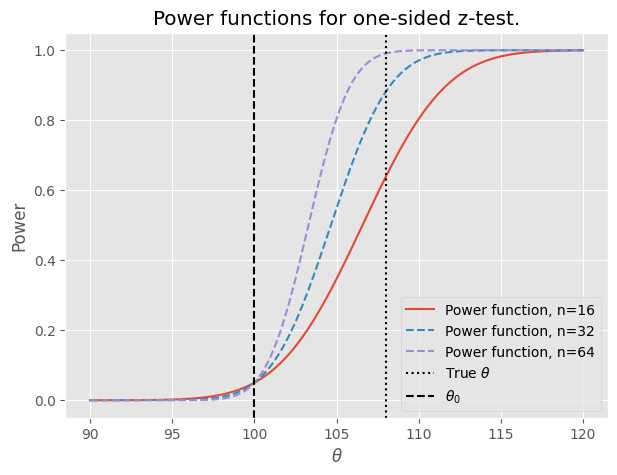

In [5]:
from mystats.plots.ztest.power import plot_power_function

theta_true = 108

theta_0 = 100
n = 16
sigma = 16
alpha = 0.05


plot_power_function(theta_0, theta_true, n, sigma, alpha)

### Size of Test:

Certainly! Let's adapt the concept of the size of a test to your provided notations:

**Definition:**  
The size of a test, denoted by $ \alpha $, is defined as  
  
$\alpha = \sup_{\theta \in \Theta_0} \gamma(\theta)$  
  
which we read as "the supremum of the power $ \gamma(\theta) $ over all $ \theta \in \Theta_0 $". More simply put, the size is the maximum power over the null space. The size is thus the largest probability of a Type I error over all $ \theta \in \Theta_0 $.

**Special Case:**  
If the null space contains a single point, say $\Theta_0 = \{\theta_0 \}$, then the size is  
  
$\alpha = \sup_{\theta \in \{\theta_0 \}} \gamma(\theta) = \gamma(\theta_0)$.  
  

**Trade-off:**  
We would like tests to have small size as well as large power when $ H_0 $ is false. We will find that there is a size and power trade-off.

This definition emphasizes that the size of the test is determined by the maximum power over all possible values of the parameter under the null hypothesis. If the null space contains only one point, the size simplifies to the power at that specific point. The trade-off mentioned acknowledges the challenge of achieving both a small size (low probability of Type I error) and a large power (high probability of correctly rejecting $ H_0 $ when it is false).

In [6]:
theta_true = 108

theta_0 = 100
n = 16
sigma = 16
alpha = 0.05

theta_crit = theta_0 + stats.norm.ppf(1-alpha)*sigma/np.sqrt(n)

size = power_function_z_onesided(theta_0, theta_0, n, sigma, alpha)
power = power_function_z_onesided(theta_true, theta_0, n, sigma, alpha)

print(f'Size: {size :5.3f}\nPower: {power :5.3f}')

Size: 0.050
Power: 0.639
